In [17]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('./mnist/data/', one_hot=True)

Extracting ./mnist/data/train-images-idx3-ubyte.gz
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz


- learning_rate = 최적화 함수에서 사용할 학습률
- training_epoch = 전체 데이터를 학습할 총횟수
- batch_size = 미니배치로 한번에 학습할 데이터의 개수
- n_hidden = 은닉층의 뉴런 개수
- n_input = 입력값의 크기


In [18]:
learning_rate = 0.01
training_epoch = 20
batch_size = 100
n_hidden = 256
n_input = 28*28

In [19]:
X = tf.placeholder(tf.float32, [None, n_input])

In [20]:
W_encode = tf.Variable(tf.random_normal([n_input, n_hidden]))
b_encode = tf.Variable(tf.random_normal([n_hidden]))

encoder = tf.nn.sigmoid(
                tf.add(tf.matmul(X, W_encode), b_encode))

In [21]:
W_decode = tf.Variable(tf.random_normal([n_hidden, n_input]))
b_decode = tf.Variable(tf.random_normal([n_input]))
decoder = tf.nn.sigmoid(
                    tf.add(tf.matmul(encoder, W_decode), b_decode))

In [22]:
cost = tf.reduce_mean(tf.pow(X - decoder, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

In [23]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

total_batch = int(mnist.train.num_examples / batch_size)

for epoch in range(training_epoch):
    total_cost = 0
    
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        _, cost_val = sess.run([optimizer, cost],
                              feed_dict={X: batch_xs})
        total_cost += cost_val
        
    print('Epoch:', '%4d' % (epoch + 1),
         'Avg. cost=', '{:.4f}'.format(total_cost / total_batch))
    
print('finish!')

Epoch:    1 Avg. cost= 0.2117
Epoch:    2 Avg. cost= 0.0711
Epoch:    3 Avg. cost= 0.0568
Epoch:    4 Avg. cost= 0.0474
Epoch:    5 Avg. cost= 0.0450
Epoch:    6 Avg. cost= 0.0436
Epoch:    7 Avg. cost= 0.0403
Epoch:    8 Avg. cost= 0.0372
Epoch:    9 Avg. cost= 0.0352
Epoch:   10 Avg. cost= 0.0335
Epoch:   11 Avg. cost= 0.0329
Epoch:   12 Avg. cost= 0.0326
Epoch:   13 Avg. cost= 0.0310
Epoch:   14 Avg. cost= 0.0308
Epoch:   15 Avg. cost= 0.0306
Epoch:   16 Avg. cost= 0.0303
Epoch:   17 Avg. cost= 0.0299
Epoch:   18 Avg. cost= 0.0297
Epoch:   19 Avg. cost= 0.0294
Epoch:   20 Avg. cost= 0.0282
finish!


In [36]:
sample_size = 10

samples = sess.run(decoder,
                      feed_dict={X: mnist.test.images[:sample_size]})

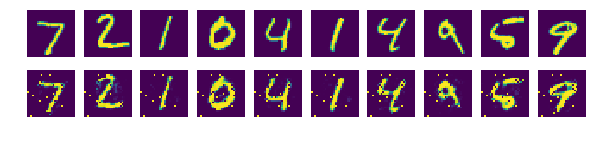

In [37]:
fig, ax = plt.subplots(2, sample_size, figsize=(sample_size, 2))
for i in range(sample_size):
    ax[0][i].set_axis_off()
    ax[1][i].set_axis_off()
    ax[0][i].imshow(np.reshape(mnist.test.images[i], (28, 28)))
    ax[1][i].imshow(np.reshape(samples[i], (28, 28)))
    
plt.show()